In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import TomekLinks
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from xgboost import XGBClassifier

In [47]:
import warnings
warnings.filterwarnings("ignore")

In [48]:
dados = pd.read_csv(
    r"D:\tensorflowteste\excelfiles\export1.csv"
    ,sep=",")


In [49]:
dados.dtypes


id_quote                 object
dt_criacao               object
dias_desejo               int64
ds_tipo_obra             object
nm_prop_oportunidade     object
nm_ambiente              object
promocional              object
convertido               object
vl_frete                float64
tipo_loja                object
revestimento              int64
officina                  int64
loucas_metais             int64
arg_rejunte               int64
outros                    int64
vlr_orcamento           float64
convertidos               int64
nao_convertidos           int64
dtype: object

In [50]:
dados.head(3)


,id_quote,dt_criacao,dias_desejo,ds_tipo_obra,nm_prop_oportunidade,nm_ambiente,promocional,convertido,vl_frete,tipo_loja,revestimento,officina,loucas_metais,arg_rejunte,outros,vlr_orcamento,convertidos,nao_convertidos
0,0Q03s000001eTc9CAE,2022-09-27,3,Reforma,ana paula goncalves lemos,toda casa,S,S,0.0,Tradicional A,1,0,0,0,0,12381.50,239,20
1,0Q03s000001dOBDCA2,2022-08-01,2,Reforma,ana paula goncalves lemos,banheiro,S,S,0.0,Tradicional A,0,0,1,0,0,448.71,239,20
2,0Q03s000000b6U7CAI,2022-06-02,11,Reforma,ana paula goncalves lemos,estabelecimento comercial,S,S,160.0,Tradicional A,1,0,0,0,0,7157.05,239,20


In [51]:
count_ds_tipo_obra = dados['ds_tipo_obra'].value_counts().reset_index()
count_ds_tipo_obra

,ds_tipo_obra,count
0,Nova Obra,5253
1,Reforma,4029


In [52]:
px.histogram(dados, x = 'ds_tipo_obra', text_auto = True)


In [53]:
px.histogram(dados, x = 'nm_ambiente', text_auto = True)


In [54]:
px.histogram(dados, x = 'convertido', text_auto = True)


In [55]:
px.box(dados, x = 'vlr_orcamento', color = 'convertido')


In [56]:
px.box(dados, x = 'vlr_orcamento', color = 'nm_ambiente')


In [57]:
px.box(dados, x = 'vlr_orcamento', color = 'ds_tipo_obra')


In [58]:
np.unique(dados['nm_ambiente'], return_counts=True)

(array(['1', '12,87', '140', '2', '3,6', '34,38', '5', '5,1', '51,17',
        '540', 'banheiro', 'circulação', 'closet', 'cozinha', 'dormitório',
        'dormitório de serviço', 'escada', 'escritório', 'espaço gourmet',
        'estabelecimento comercial', 'fachada', 'garagem',
        'hall de entrada', 'itens de assentamento', 'lavabo', 'officina',
        'piscina', 'sacada', 'sala', 'terraço', 'toda casa', 'varanda',
        'área de serviço', 'área externa'], dtype=object),
 array([   1,    1,    1,    1,    1,    1,    1,    1,    1,    1, 2114,
          30,    2,  846,   74,    4,   28,   31,  210,  263,   57,   50,
          53, 1281,  313,   96,  377,   64,  755,   25, 1653,   60,  332,
         650], dtype=int64))

In [59]:
dados['ds_tipo_obra'].value_counts(normalize=True) * 100

ds_tipo_obra
Nova Obra    56.593407
Reforma      43.406593
Name: proportion, dtype: float64

In [60]:
dados['ds_tipo_obra'].value_counts()

ds_tipo_obra
Nova Obra    5253
Reforma      4029
Name: count, dtype: int64

In [61]:
dados['nm_ambiente'].value_counts()

nm_ambiente
banheiro                     2114
toda casa                    1653
itens de assentamento        1281
cozinha                       846
sala                          755
área externa                  650
piscina                       377
área de serviço               332
lavabo                        313
estabelecimento comercial     263
espaço gourmet                210
officina                       96
dormitório                     74
sacada                         64
varanda                        60
fachada                        57
hall de entrada                53
garagem                        50
escritório                     31
circulação                     30
escada                         28
terraço                        25
dormitório de serviço           4
closet                          2
140                             1
540                             1
1                               1
12,87                           1
51,17                           1
3,

In [62]:
dados['nm_ambiente'].value_counts(normalize=True) * 100

nm_ambiente
banheiro                     22.542120
toda casa                    17.626360
itens de assentamento        13.659629
cozinha                       9.021113
sala                          8.050757
área externa                  6.931115
piscina                       4.020047
área de serviço               3.540200
lavabo                        3.337599
estabelecimento comercial     2.804436
espaço gourmet                2.239283
officina                      1.023672
dormitório                    0.789081
sacada                        0.682448
varanda                       0.639795
fachada                       0.607806
hall de entrada               0.565152
garagem                       0.533163
escritório                    0.330561
circulação                    0.319898
escada                        0.298571
terraço                       0.266581
dormitório de serviço         0.042653
closet                        0.021327
140                           0.010663
540          

In [63]:
dados['convertido'].value_counts()

convertido
N    5146
S    4232
Name: count, dtype: int64

In [64]:
dados['convertido'].value_counts(normalize=True) * 100

convertido
N    54.873107
S    45.126893
Name: proportion, dtype: float64

In [65]:

contagem = dados.groupby(['ds_tipo_obra', 'convertido']).size().reset_index(name='Contagem')

contagem['Porcentagem'] = contagem.groupby('ds_tipo_obra')['Contagem'].transform(lambda x: (x / x.sum()) * 100)

color_dict = {0: '#e34c42', 1: '#4dc471'} 

fig = px.bar(contagem, 
             y='ds_tipo_obra', 
             x='Porcentagem', 
             color='convertido', 
             orientation='h', 
             color_discrete_map=color_dict,
             labels={'ds_tipo_obra': 'Tipo de Obra', 'Porcentagem': 'Porcentagem (%)', 'convertido': 'Convertido'})

fig.update_layout(title='Distribuição Percentual de Tipos de Obra Convertidos e Não Convertidos',
                  xaxis_title='Porcentagem (%)',
                  yaxis_title='Tipo de Obra')

fig.show()

In [66]:

contagem = dados.groupby(['ds_tipo_obra', 'nm_ambiente']).size().reset_index(name='Contagem')

contagem['Porcentagem'] = contagem.groupby('ds_tipo_obra')['Contagem'].transform(lambda x: (x / x.sum()) * 100)

fig = px.bar(contagem, 
             y='ds_tipo_obra', 
             x='Porcentagem', 
             color='nm_ambiente', 
             orientation='h', 
             labels={'ds_tipo_obra': 'Tipo de Obra', 'Porcentagem': 'Porcentagem (%)', 'nm_ambiente': 'Ambiente'})

fig.update_layout(title='Distribuição Percentual de Tipos de Obra por Ambiente',
                  xaxis_title='Porcentagem (%)',
                  yaxis_title='Tipo de Obra')

fig.show()


In [67]:
dados[dados['convertido'] == 'S']

,id_quote,dt_criacao,dias_desejo,ds_tipo_obra,nm_prop_oportunidade,nm_ambiente,promocional,convertido,vl_frete,tipo_loja,revestimento,officina,loucas_metais,arg_rejunte,outros,vlr_orcamento,convertidos,nao_convertidos
0,0Q03s000001eTc9CAE,2022-09-27,3,Reforma,ana paula goncalves lemos,toda casa,S,S,0.00,Tradicional A,1,0,0,0,0,12381.50,239,20
1,0Q03s000001dOBDCA2,2022-08-01,2,Reforma,ana paula goncalves lemos,banheiro,S,S,0.00,Tradicional A,0,0,1,0,0,448.71,239,20
2,0Q03s000000b6U7CAI,2022-06-02,11,Reforma,ana paula goncalves lemos,estabelecimento comercial,S,S,160.00,Tradicional A,1,0,0,0,0,7157.05,239,20
3,0Q03s000001dOrMCAU,2022-07-21,174,Nova Obra,ana paula goncalves lemos,lavabo,S,S,2833.33,Tradicional A,0,1,7,0,0,3973.89,239,20
4,0Q03s000001BncTCAS,2022-05-27,14,Nova Obra,ana paula goncalves lemos,itens de assentamento,S,S,0.00,Tradicional A,0,0,0,2,0,25.80,239,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9362,0Q0SG0000005Fb70AE,2023-11-11,2,NaN,ediane rosa,banheiro,S,S,11666.67,Tradicional A,2,0,0,6,0,3870.51,34,4
9363,0Q0SG0000008CSD0A2,2023-11-14,1,Nova Obra,ediane rosa,banheiro,S,S,11666.67,Tradicional A,2,0,0,6,0,3995.92,34,4
9364,0Q0SG0000005Fb70AE,2023-11-11,2,NaN,ediane rosa,terraço,S,S,11666.67,Tradicional A,0,1,0,1,0,13236.01,34,4
9365,0Q0SG000000899O0AQ,2023-11-14,0,Nova Obra,felipe pedroso alves,estabelecimento comercial,S,S,100.00,Tradicional A,1,0,0,0,0,234.73,2,4


In [68]:
categoricos = ['id_quote','dt_criacao','ds_tipo_obra','nm_prop_oportunidade'
               ,'nm_ambiente','promocional','tipo_loja']

In [69]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [70]:
encoder = OneHotEncoder(drop='if_binary')


In [71]:
df_categorico = dados[categoricos]


In [72]:
df_encoded = pd.DataFrame(encoder.fit_transform(df_categorico).toarray(),
                          columns=encoder.get_feature_names_out(categoricos))

In [73]:
df_final = pd.concat([dados.drop(categoricos, axis=1), df_encoded], axis=1)


In [74]:
X = df_final.drop('convertido', axis=1)
y = df_final['convertido']

In [75]:
"""
Classificação com Tensorflow e XGBoost

"""

'\nClassificação com Tensorflow e XGBoost\n\n'

In [76]:
"""Classificação com XGBOOST"""


encoder = OneHotEncoder(drop='if_binary')
df_encoded = pd.DataFrame(encoder.fit_transform(dados[categoricos]).toarray(), columns=encoder.get_feature_names_out(categoricos))
df_final = pd.concat([dados.drop(categoricos, axis=1), df_encoded], axis=1)

X = df_final.drop('convertido', axis=1)
y = df_final['convertido']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_treino = scaler.fit_transform(x_treino)
x_teste = scaler.transform(x_teste)

smote = SMOTE(random_state=42)
x_treino_resampled, y_treino_resampled = smote.fit_resample(x_treino, y_treino)

modelo_xgboost = XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss', reg_alpha=0.001, reg_lambda=0.001)

modelo_xgboost.fit(x_treino_resampled, y_treino_resampled)

probabilidades_teste = modelo_xgboost.predict_proba(x_teste)[:, 1]

x_teste_df = pd.DataFrame(x_teste, columns=X.columns)


df_temporario_teste = pd.DataFrame({
    'nm_prop_oportunidade': dados.loc[x_teste_df.index, 'nm_prop_oportunidade'],
    'convertido': y_teste,
    'probabilidade_conversao': probabilidades_teste
})

df_temporario_teste = df_temporario_teste.drop_duplicates(subset=['nm_prop_oportunidade', 'convertido'])

"""Agrupando por 'nm_prop_oportunidade' e calculando a média das probabilidades"""
df_resultados_teste = df_temporario_teste.groupby('nm_prop_oportunidade', as_index=False).agg({
    'convertido': 'first',
    'probabilidade_conversao': 'mean'
})

y_pred_probs = modelo_xgboost.predict_proba(x_teste)[:, 1]
y_pred_classes = np.round(y_pred_probs)
acuracia = accuracy_score(y_teste, y_pred_classes)
print(f'Acurácia no conjunto de teste: {acuracia * 100:.2f}%')

with pd.option_context('display.max_rows', None):
    display(df_resultados_teste[['nm_prop_oportunidade', 'convertido', 'probabilidade_conversao']])

pd.reset_option('display.max_rows')

df_resultados_teste.to_csv('resultados_teste_xgboost.csv', index=False)


Acurácia no conjunto de teste: 73.77%


,nm_prop_oportunidade,convertido,probabilidade_conversao
0,ana paula goncalves lemos,1,0.354008
1,fabiano martins werutsky,0,0.489150
2,juliana westphalen gonçalves,1,0.366401


In [81]:
df_resultados_teste

,nm_prop_oportunidade,convertido,probabilidade_conversao
0,ana paula goncalves lemos,S,0.115441
1,fabiano martins werutsky,N,0.500032
2,juliana westphalen gonçalves,S,0.093734


In [2]:


dados = pd.read_csv(
    r"D:\tensorflowteste\excelfiles\export1.csv"
    ,sep=",")

categoricos = ['id_quote','dt_criacao','ds_tipo_obra','nm_prop_oportunidade'
               ,'nm_ambiente','promocional','tipo_loja']

encoder = OneHotEncoder(drop='if_binary')
df_encoded = pd.DataFrame(encoder.fit_transform(dados[categoricos]).toarray(), columns=encoder.get_feature_names_out(categoricos))
df_final = pd.concat([dados.drop(categoricos, axis=1), df_encoded], axis=1)

X = df_final.drop('convertido', axis=1)
y = df_final['convertido']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_treino = scaler.fit_transform(x_treino)
x_teste = scaler.transform(x_teste)

smote = SMOTE(random_state=42)
x_treino_resampled, y_treino_resampled = smote.fit_resample(x_treino, y_treino)

modelo = Sequential()
modelo.add(Dense(units=256, activation='relu', input_dim=x_treino_resampled.shape[1], kernel_regularizer=tf.keras.regularizers.l2(0.001)))
modelo.add(Dropout(0.5))
modelo.add(Dense(units=128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
modelo.add(Dropout(0.5))
modelo.add(Dense(units=64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
modelo.add(Dropout(0.5))
modelo.add(Dense(units=32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
modelo.add(Dropout(0.5))
modelo.add(Dense(units=1, activation='sigmoid'))

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

modelo.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
modelo.fit(x_treino_resampled, y_treino_resampled, epochs=30, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

probabilidades_teste = modelo.predict(x_teste).flatten()
y_pred_classes = np.round(probabilidades_teste)
acuracia = accuracy_score(y_teste, y_pred_classes)

print(f'Acurácia no conjunto de teste: {acuracia * 100:.2f}%')
print(classification_report(y_teste, y_pred_classes))

x_teste_df = pd.DataFrame(x_teste, columns=X.columns)

df_temporario_teste = pd.DataFrame({
    'nm_prop_oportunidade': dados.loc[x_teste_df.index, 'nm_prop_oportunidade'],
    'convertido': label_encoder.inverse_transform(y_teste),
    'probabilidade_conversao': probabilidades_teste
})

df_temporario_teste = df_temporario_teste.drop_duplicates(subset=['nm_prop_oportunidade', 'convertido'])
df_resultados_teste = df_temporario_teste.groupby('nm_prop_oportunidade', as_index=False).agg({
    'convertido': 'first',
    'probabilidade_conversao': 'mean'
})

with pd.option_context('display.max_rows', None):
    display(df_resultados_teste[['nm_prop_oportunidade', 'convertido', 'probabilidade_conversao']])

pd.reset_option('display.max_rows')

df_resultados_teste.to_csv('resultados_teste_tensorflow.csv', index=False)



Epoch 1/30
208/208 [==============================] - 5s 21ms/step - loss: 1.7779 - accuracy: 0.5032 - val_loss: 1.3233 - val_accuracy: 0.4343
Epoch 2/30
208/208 [==============================] - 4s 20ms/step - loss: 1.4321 - accuracy: 0.5182 - val_loss: 1.2497 - val_accuracy: 0.4066
Epoch 3/30
208/208 [==============================] - 4s 20ms/step - loss: 1.3077 - accuracy: 0.5235 - val_loss: 1.2061 - val_accuracy: 0.4253
Epoch 4/30
208/208 [==============================] - 4s 20ms/step - loss: 1.2454 - accuracy: 0.5309 - val_loss: 1.1836 - val_accuracy: 0.3934
Epoch 5/30
208/208 [==============================] - 4s 19ms/step - loss: 1.2067 - accuracy: 0.5312 - val_loss: 1.1696 - val_accuracy: 0.3590
Epoch 6/30
208/208 [==============================] - 4s 18ms/step - loss: 1.1748 - accuracy: 0.5582 - val_loss: 1.1595 - val_accuracy: 0.3596
Epoch 7/30
208/208 [==============================] - 4s 19ms/step - loss: 1.1579 - accuracy: 0.5556 - val_loss: 1.1505 - val_accuracy: 0.3633

,nm_prop_oportunidade,convertido,probabilidade_conversao
0,ana paula goncalves lemos,S,0.138449
1,fabiano martins werutsky,N,0.500039
2,juliana westphalen gonçalves,S,0.080166


In [3]:


dados = pd.read_csv(r"D:\tensorflowteste\excelfiles\export1.csv", sep=",")

categoricos = ['id_quote', 'dt_criacao', 'ds_tipo_obra', 'nm_prop_oportunidade', 'nm_ambiente', 'promocional', 'tipo_loja']

encoder = OneHotEncoder(drop='if_binary')
df_encoded = pd.DataFrame(encoder.fit_transform(dados[categoricos]).toarray(), columns=encoder.get_feature_names_out(categoricos))
df_final = pd.concat([dados.drop(categoricos, axis=1), df_encoded], axis=1)

X = df_final.drop('convertido', axis=1)
y = df_final['convertido']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_treino = scaler.fit_transform(x_treino)
x_teste = scaler.transform(x_teste)

smote = SMOTE(random_state=42)
x_treino_resampled, y_treino_resampled = smote.fit_resample(x_treino, y_treino)

modelo = Sequential()
modelo.add(Dense(units=256, activation='relu', input_dim=x_treino_resampled.shape[1], kernel_regularizer=tf.keras.regularizers.l2(0.001)))
modelo.add(Dropout(0.5))
modelo.add(Dense(units=128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
modelo.add(Dropout(0.5))
modelo.add(Dense(units=64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
modelo.add(Dropout(0.5))
modelo.add(Dense(units=32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
modelo.add(Dropout(0.5))
modelo.add(Dense(units=1, activation='sigmoid'))

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

modelo.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
modelo.fit(x_treino_resampled, y_treino_resampled, epochs=30, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

probabilidades_teste = modelo.predict(x_teste).flatten()
y_pred_classes = np.round(probabilidades_teste)
acuracia = accuracy_score(y_teste, y_pred_classes)

print(f'Acurácia no conjunto de teste: {acuracia * 100:.2f}%')
print(classification_report(y_teste, y_pred_classes))

x_teste_df = pd.DataFrame(x_teste, columns=X.columns)

df_temporario_teste = pd.DataFrame({
    'nm_prop_oportunidade': dados.loc[x_teste_df.index, 'nm_prop_oportunidade'],
    'convertido': label_encoder.inverse_transform(y_teste),
    'probabilidade_conversao': probabilidades_teste
})
df_temporario_teste = df_temporario_teste.drop_duplicates(subset=['nm_prop_oportunidade', 'convertido'])
df_resultados_teste = df_temporario_teste.groupby('nm_prop_oportunidade', as_index=False).agg({
    'convertido': 'first',
    'probabilidade_conversao': 'mean'
})

with pd.option_context('display.max_rows', None):
    display(df_resultados_teste[['nm_prop_oportunidade', 'convertido', 'probabilidade_conversao']])

pd.reset_option('display.max_rows')

df_resultados_teste.to_csv('resultados_teste_tensorflow.csv', index=False)

modelo.save('modelo_tensorflow.h5')

modelo_carregado = load_model('modelo_tensorflow.h5')


Epoch 1/30
208/208 [==============================] - 6s 21ms/step - loss: 1.8148 - accuracy: 0.5092 - val_loss: 1.3201 - val_accuracy: 0.5452
Epoch 2/30
208/208 [==============================] - 5s 22ms/step - loss: 1.4364 - accuracy: 0.5121 - val_loss: 1.2447 - val_accuracy: 0.5139
Epoch 3/30
208/208 [==============================] - 4s 20ms/step - loss: 1.3038 - accuracy: 0.5178 - val_loss: 1.2019 - val_accuracy: 0.5175
Epoch 4/30
208/208 [==============================] - 4s 20ms/step - loss: 1.2443 - accuracy: 0.5252 - val_loss: 1.1792 - val_accuracy: 0.5036
Epoch 5/30
208/208 [==============================] - 4s 20ms/step - loss: 1.2028 - accuracy: 0.5279 - val_loss: 1.1654 - val_accuracy: 0.4380
Epoch 6/30
208/208 [==============================] - 4s 18ms/step - loss: 1.1826 - accuracy: 0.5425 - val_loss: 1.1573 - val_accuracy: 0.3771
Epoch 7/30
208/208 [==============================] - 4s 19ms/step - loss: 1.1661 - accuracy: 0.5417 - val_loss: 1.1517 - val_accuracy: 0.3392

,nm_prop_oportunidade,convertido,probabilidade_conversao
0,ana paula goncalves lemos,S,0.149588
1,fabiano martins werutsky,N,0.500067
2,juliana westphalen gonçalves,S,0.167191


d:\tensorflowteste\venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [6]:

%load_ext tensorboard

In [ ]:
tensorboard --logdir=./logs

Epoch 1/30
208/208 [==============================] - 6s 24ms/step - loss: 1.6056 - accuracy: 0.5119 - val_loss: 1.2864 - val_accuracy: 0.5337
Epoch 2/30
208/208 [==============================] - 5s 22ms/step - loss: 1.3292 - accuracy: 0.5234 - val_loss: 1.2132 - val_accuracy: 0.4440
Epoch 3/30
208/208 [==============================] - 4s 21ms/step - loss: 1.2396 - accuracy: 0.5197 - val_loss: 1.1749 - val_accuracy: 0.4060
Epoch 4/30
208/208 [==============================] - 4s 21ms/step - loss: 1.1924 - accuracy: 0.5309 - val_loss: 1.1542 - val_accuracy: 0.4054
Epoch 5/30
208/208 [==============================] - 4s 21ms/step - loss: 1.1679 - accuracy: 0.5274 - val_loss: 1.1420 - val_accuracy: 0.3873
Epoch 6/30
208/208 [==============================] - 4s 21ms/step - loss: 1.1442 - accuracy: 0.5369 - val_loss: 1.1355 - val_accuracy: 0.3458
Epoch 7/30
208/208 [==============================] - 4s 21ms/step - loss: 1.1329 - accuracy: 0.5431 - val_loss: 1.1295 - val_accuracy: 0.3331

,nm_prop_oportunidade,convertido,probabilidade_conversao
0,ana paula goncalves lemos,S,0.268304
1,fabiano martins werutsky,N,0.500011
2,juliana westphalen gonçalves,S,0.075510


d:\tensorflowteste\venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


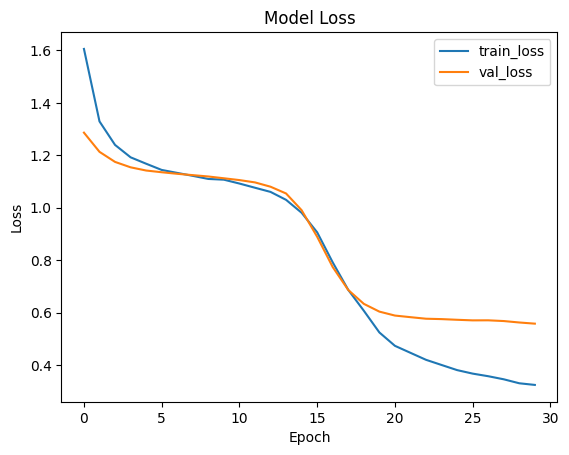

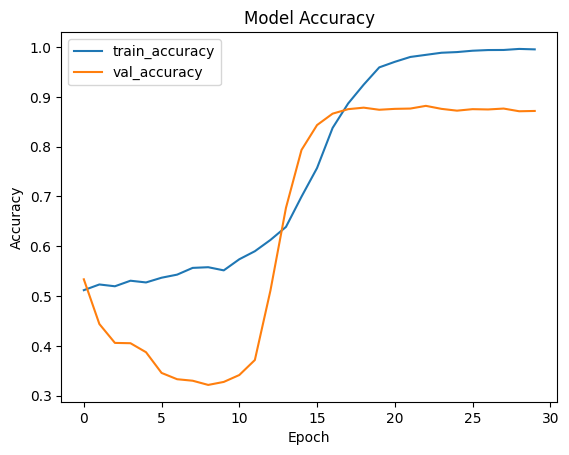

In [16]:


dados = pd.read_csv(r"D:\tensorflowteste\excelfiles\export1.csv", sep=",")

categoricos = ['id_quote', 'dt_criacao', 'ds_tipo_obra', 'nm_prop_oportunidade', 'nm_ambiente', 'promocional', 'tipo_loja']

encoder = OneHotEncoder(drop='if_binary')
df_encoded = pd.DataFrame(encoder.fit_transform(dados[categoricos]).toarray(), columns=encoder.get_feature_names_out(categoricos))
df_final = pd.concat([dados.drop(categoricos, axis=1), df_encoded], axis=1)

X = df_final.drop('convertido', axis=1)
y = df_final['convertido']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

x_treino = scaler.fit_transform(x_treino)
x_teste = scaler.transform(x_teste)

"""SMOTE para lidar com desbalanceamento"""
smote = SMOTE(random_state=42)
x_treino_resampled, y_treino_resampled = smote.fit_resample(x_treino, y_treino)


modelo = Sequential()
modelo.add(Dense(units=256, activation='relu', input_dim=x_treino_resampled.shape[1], kernel_regularizer=tf.keras.regularizers.l2(0.001)))
modelo.add(Dropout(0.5))
modelo.add(Dense(units=128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
modelo.add(Dropout(0.5))
modelo.add(Dense(units=64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
modelo.add(Dropout(0.5))
modelo.add(Dense(units=32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
modelo.add(Dropout(0.5))
modelo.add(Dense(units=1, activation='sigmoid'))


early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=1)
modelo.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

history = modelo.fit(x_treino_resampled, y_treino_resampled, epochs=30, batch_size=32, validation_split=0.2, callbacks=[early_stopping, tensorboard_callback])

probabilidades_teste = modelo.predict(x_teste).flatten()
y_pred_classes = np.round(probabilidades_teste)
acuracia = accuracy_score(y_teste, y_pred_classes)

print(f'Acurácia no conjunto de teste: {acuracia * 100:.2f}%')
print(classification_report(y_teste, y_pred_classes))

x_teste_df = pd.DataFrame(x_teste, columns=X.columns)

df_temporario_teste = pd.DataFrame({
    'nm_prop_oportunidade': dados.loc[x_teste_df.index, 'nm_prop_oportunidade'],
    'convertido': label_encoder.inverse_transform(y_teste),
    'probabilidade_conversao': probabilidades_teste
})


"""Remoção de linhas duplicadas e agregação por oportunidade"""
df_temporario_teste = df_temporario_teste.drop_duplicates(subset=['nm_prop_oportunidade', 'convertido'])
df_resultados_teste = df_temporario_teste.groupby('nm_prop_oportunidade', as_index=False).agg({
    'convertido': 'first',
    'probabilidade_conversao': 'mean'
})


with pd.option_context('display.max_rows', None):
    display(df_resultados_teste[['nm_prop_oportunidade', 'convertido', 'probabilidade_conversao']])

pd.reset_option('display.max_rows')


df_resultados_teste.to_csv('resultados_teste_tensorflow.csv', index=False)

"""Salva Modelo"""
modelo.save('modelo_tensorflow.h5')

"""Carrega Modelo"""
modelo_carregado = load_model('modelo_tensorflow.h5')

"""perda durante o treinamento"""
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


"""acurácia durante o treinamento"""
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [17]:
acuracia = accuracy_score(y_teste, y_pred_classes)
print(f'Acurácia no conjunto de teste: {acuracia * 100:.2f}%')

Acurácia no conjunto de teste: 77.67%
